**Application Types**
- Federal forms like I-589 and I-485 have higher denial rates, often linked to administrative reasons.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('../data/Exercise #2.xlsx')

# Clean and trim column names
data.columns = (data.columns
                         .str.strip()                               # Remove leading and trailing spaces
                         .str.replace(r'\s+', '_', regex=True)      # Replace multiple spaces with a single underscore
                         .str.lower()                               # Convert to lowercase
                         .str.replace(r'[^\w]', '_', regex=True)    # Replace non-alphanumeric characters with underscores
                         .str.replace(r'_{2,}', '_', regex=True)    # Replace multiple consecutive underscores with a single underscore
                         .str.strip('_')                            # Remove leading and trailing underscores
                        )

print(data.columns)

# Display the first few rows of the dataset
data.head()

Index(['mirc_subpractice', 'attorney_on_case', 'client_birthdate',
       'client_country_of_origin', 'client_language', 'client_city',
       'immigration_court_location', 'event_type', 'event_date',
       'application_petition_type',
       'application_petition_outcome_date_if_applicable',
       'application_petition_outcome', 'court_hearing_is_remote_or_in_person',
       'reason_for_application_petition_denial_provided_by_uscis',
       'reason_for_case_representation_ended_if_applicable'],
      dtype='object')


,mirc_subpractice,attorney_on_case,client_birthdate,client_country_of_origin,client_language,client_city,immigration_court_location,event_type,event_date,application_petition_type,application_petition_outcome_date_if_applicable,application_petition_outcome,court_hearing_is_remote_or_in_person,reason_for_application_petition_denial_provided_by_uscis,reason_for_case_representation_ended_if_applicable
0,Released,BB,2008-02-10,Afghanistan,NaN,Grand Rapids,Detroit,Application/petition filed,2022-09-13 00:00:00,I-485,2022-09-21,Denied,NaN,Fee not included,NaN
1,Released,BB,NaT,Afghanistan,NaN,Kalamazoo,Detroit,Application/petition filed,2022-11-12 00:00:00,I-360,2022-11-23,Denied,NaN,Request for evidence not responded to,NaN
2,Released,DD,2008-03-29,Afghanistan,Pashto,Ypsilanti,Detroit,Application/petition filed,2022-12-16 00:00:00,State Court Petition,NaT,Pending,NaN,NaN,Immigration Relief Granted
3,Released,CC,2005-06-12,Afghanistan,NaN,Traverse City,Detroit,Application/petition filed,2022-09-22 00:00:00,State Court Petition,2022-10-01,Granted,NaN,NaN,NaN
4,Released,CC,2004-03-15,Afghanistan,NaN,Traverse City,Detroit,Application/petition filed,2022-12-22 00:00:00,State Court Petition,NaT,Pending,NaN,NaN,NaN


Denial Rates by Application/Petition Type:
application_petition_type
I-589                   63.157895
I-485                   15.789474
I-360                   10.526316
State Court Petition    10.526316
Name: proportion, dtype: float64


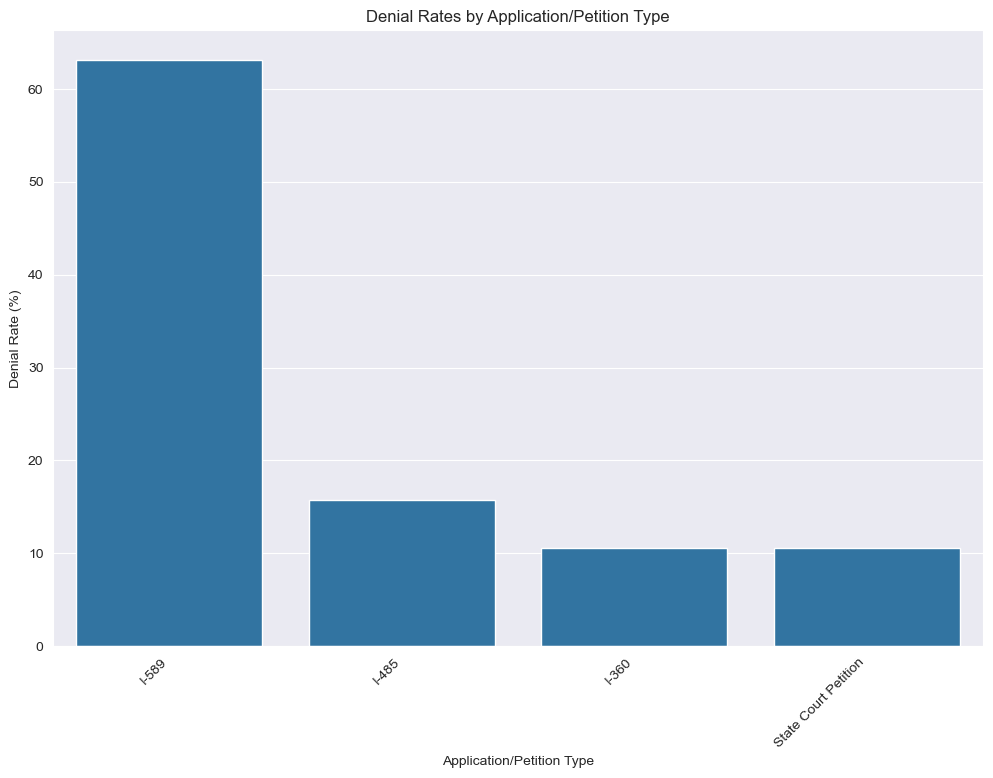

Common Reasons for Denial:
reason_for_application_petition_denial_provided_by_uscis
Outdated form                            8
Fee not included                         6
Request for evidence not responded to    3
Outdated Form                            1
Missing documentation                    1
Name: count, dtype: int64


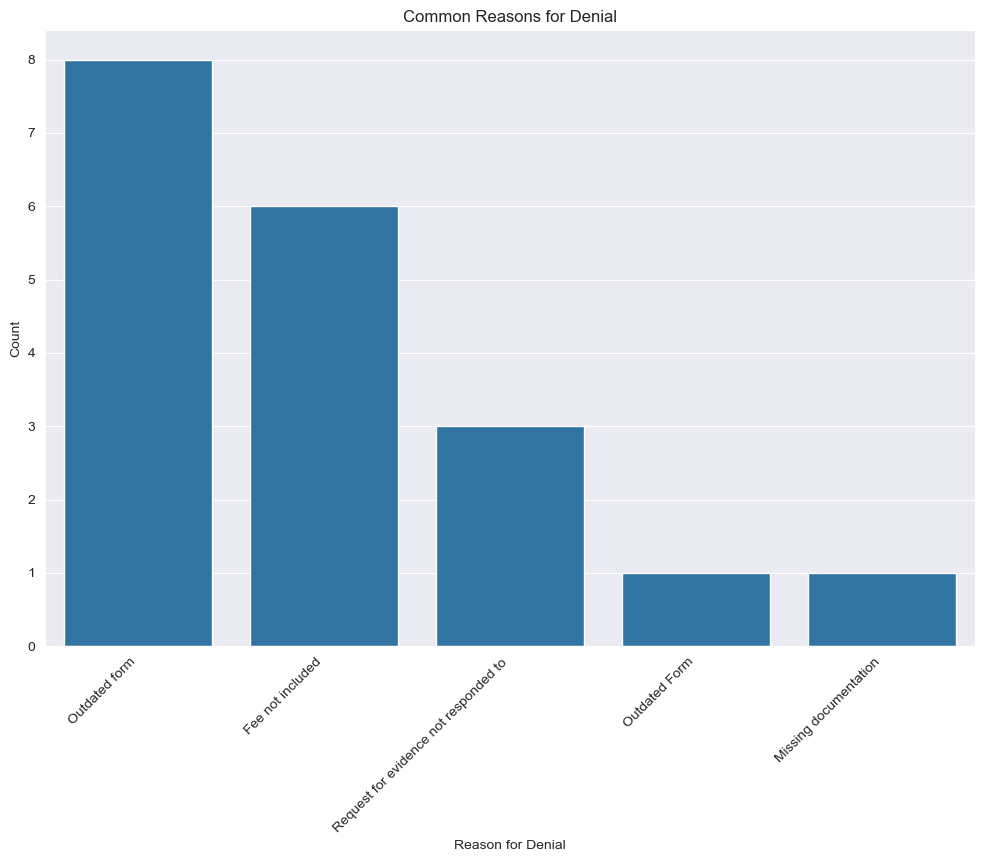

Rate of Denials Linked to Administrative Reasons: 57.89%


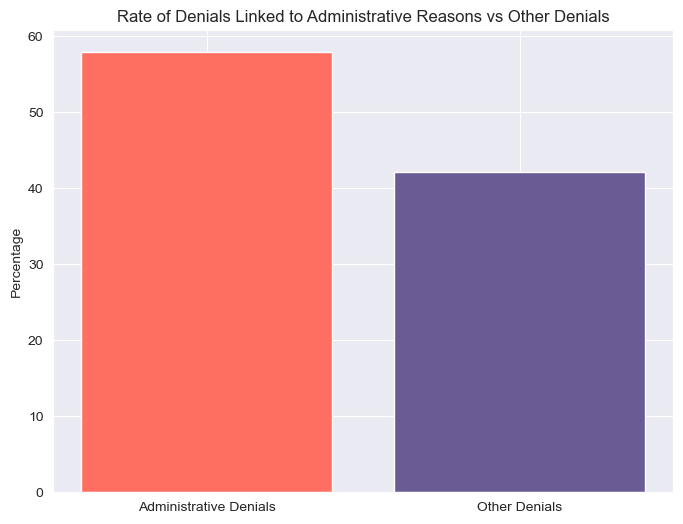

In [8]:

# Data Preprocessing
# Convert 'application/petition outcome date (if applicable)' and 'event_date' to datetime
data['application_petition_outcome_date_if_applicable'] = pd.to_datetime(data['application_petition_outcome_date_if_applicable'], errors='coerce')
data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')

# Extract the year from the 'application/petition outcome date (if applicable)' for analysis
data['outcome_year'] = data['application_petition_outcome_date_if_applicable'].dt.year

# Filter out rows where 'application/petition outcome' is not 'Denied'
denied_data = data[data['application_petition_outcome'] == 'Denied']

# Calculate denial rates for each application/petition type
denial_rates = denied_data['application_petition_type'].value_counts(normalize=True) * 100

# Display the denial rates
print("Denial Rates by Application/Petition Type:")
print(denial_rates)

# Plot the denial rates
plt.figure(figsize=(12, 8))
sns.barplot(x=denial_rates.index, y=denial_rates.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Application/Petition Type')
plt.ylabel('Denial Rate (%)')
plt.title('Denial Rates by Application/Petition Type')
plt.show()

# Additional Analysis: Common reasons for denial
# Count the occurrences of different denial reasons
denial_reasons = denied_data['reason_for_application_petition_denial_provided_by_uscis'].value_counts()

# Display the denial reasons
print("Common Reasons for Denial:")
print(denial_reasons)

# Plot the common reasons for denial
plt.figure(figsize=(12, 8))
sns.barplot(x=denial_reasons.index, y=denial_reasons.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Reason for Denial')
plt.ylabel('Count')
plt.title('Common Reasons for Denial')
plt.show()

# Analysis of Denials Linked to Administrative Reasons
# Define a list of administrative reasons
administrative_reasons = [
    'Fee not included',
    'Request for evidence not responded to',
    'Outdated Form',
    'Missing documentation',
    'Other'
]

# Filter the dataset for administrative reasons
admin_denials = denied_data[denied_data['reason_for_application_petition_denial_provided_by_uscis'].isin(administrative_reasons)]

# Calculate the rate of denials linked to administrative reasons
admin_denial_rate = (len(admin_denials) / len(denied_data)) * 100

print(f"Rate of Denials Linked to Administrative Reasons: {admin_denial_rate:.2f}%")

# Plot the rate of denials linked to administrative reasons
plt.figure(figsize=(8, 6))
plt.bar(['Administrative Denials', 'Other Denials'], [admin_denial_rate, 100 - admin_denial_rate], color=['#FF6F61', '#6B5B95'])
plt.ylabel('Percentage')
plt.title('Rate of Denials Linked to Administrative Reasons vs Other Denials')
plt.show()
